In [41]:
# using TA-Lib
# http://mrjbq7.github.io/ta-lib/install.html

# copy from Pythonで簡単なモメンタム投資モデルを作る http://qiita.com/sawadybomb/items/9dc9d858aa399c8b4011
# GUI manual https://media.readthedocs.org/pdf/jons-widgets-fork/nicedocs/jons-widgets-fork.pdf

In [63]:
%matplotlib inline
from db import DB
import datetime as dt
import sqlite3
import pandas.io.sql as psql
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
import pandas.tseries.offsets as offsets
import ipywidgets as widgets
from IPython.display import display

In [64]:
conn = sqlite3.connect("brand.sqlite3")
brand_list = psql.read_sql('select * from brand_list where market = "マザーズ"',conn)

In [65]:
codes = {}
for row in brand_list.values:
    codes[row[2].replace('(株)','')] = row[0]

In [66]:
codes

{'あんしん保証': 7183,
 'じげん': 3679,
 'そーせいグループ': 4565,
 'はてな': 3930,
 'みんなのウェディング': 3685,
 'アイティメディア': 2148,
 'アイドママーケティングコミュニケーション': 9466,
 'アイビーシー': 3920,
 'アイリッジ': 3917,
 'アカツキ': 3932,
 'アキュセラ': 4589,
 'アクアライン': 6173,
 'アクセルマーク': 3624,
 'アクトコール': 6064,
 'アクロディア': 3823,
 'アスカネット': 2438,
 'アトラエ': 6194,
 'アドウェイズ': 2489,
 'アドバンスト・メディア': 3773,
 'アドベンチャー': 6030,
 'アプリックスＩＰホールディングス': 3727,
 'アマナ': 2402,
 'アライドアーキテクツ': 6081,
 'アルファポリス': 9467,
 'アンジェス\u3000ＭＧ': 4563,
 'アーキテクツ・スタジオ・ジャパン': 6085,
 'アークン': 3927,
 'アールエイジ': 3248,
 'イグニス': 3689,
 'イトクロ': 6049,
 'インスペック': 6656,
 'インソース': 6200,
 'インタースペース': 2122,
 'インテア・ホールディングス': 3734,
 'イントランス': 3237,
 'インフォテリア': 3853,
 'インベスターズクラウド': 1435,
 'イード': 6038,
 'エクストリーム': 6033,
 'エディア': 3935,
 'エナリス': 6079,
 'エニグモ': 3665,
 'エヌ・ピー・シー': 6255,
 'エボラブルアジア': 6191,
 'エムビーエス': 1401,
 'エリアリンク': 8914,
 'エンカレッジ・テクノロジ': 3682,
 'エンバイオ・ホールディングス': 6092,
 'オイシックス': 3182,
 'オウチーノ': 6084,
 'オンコセラピー・サイエンス': 4564,
 'オンコリスバイオファーマ': 4588,
 'オークファン': 3674,
 'オープンドア': 3926,
 'カイオム

In [87]:
w = widgets.Dropdown(
    options = codes,
    values=1433,
    description='銘柄：'
)
display(w)

data = pd.DataFrame()

def read_data(b):
    print(b)
    print(w.value)
    global data
    code = w.value
    db = DB(code)
    data = db.read()
    
def momentum_plot():
    global data
    data['close'].astype(np.float64)
    momentum = ta.MOM(data['close'].values,250)

    length = len(data.index)
    cash = [None for row in range(length)]
    position = [None for row in range(length)]
    asset = [None for row in range(length)]

    cash[0] = 100000
    position[0] = 0

    for i, (index, row) in enumerate(data.iterrows()):
        if i > 0:
            cash[i] = cash[i-1]
            position[i] = position[i-1]
            
            if momentum[i] > 0 and momentum[i-1] < 0:
                amount = cash[i] // row['close']
                position[i] += amount
                cash[i] -= amount * row['close'] + 150
            
            elif momentum[i] < 0 and momentum[i-1] > 0:
                cash[i] += position[i] * row['close'] - 150
                position[i] =0
        asset[i] = cash[i] + position[i] * row['close']
    
    data['asset'] = asset
    
    # plot result
    d2 = pd.DataFrame()
    d2['Stock'] = data['close'] / data['close'][0] * 100
    d2['Performance'] = asset
    d2['Performance'] = d2['Performance'] / asset[0] * 100
    d2 = d2.set_index(pd.to_datetime(data['date']))

    d2.plot()



button = widgets.Button(description="データ読み込み")
display(button)
button.on_click(read_data)

1433
code_1433: The table found


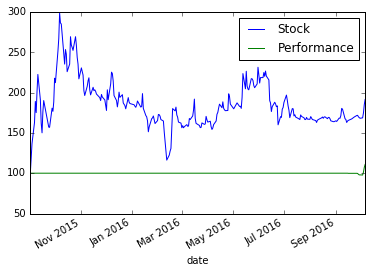

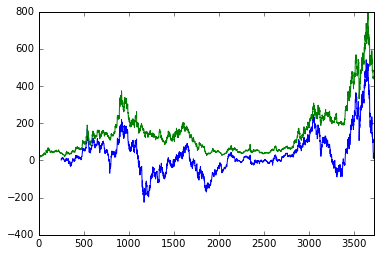

In [47]:
data['momentam'] = ta.MOM(data['close'].values,250)
data['momentam'].plot()
data['close'].plot()